<a href="https://colab.research.google.com/github/EdsonFeio/TCC/blob/main/TCC_COVID_RA%C3%87AS_SP_01_a_05_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [2]:
#cor_se_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/cor-se-suspeitos-2020-2021.csv', sep=';', encoding = "ISO-8859-1",
                     #skiprows=[0,1,2,3,4,13,14,15,16])#Base commpleta atualizada até o dia 13/05/2021

#cor_se_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/cor-se-suspeitos-01-a-07_2020.csv', sep=';', encoding = "ISO-8859-1",
                     #skiprows=[0,1,2,3,4,13,14,15,16])#Base indo do mês 01 até 07 de 2020

#cor_se_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/cor-se-suspeitos-08-a-12_2020.csv', sep=';', encoding = "ISO-8859-1",
                     #skiprows=[0,1,2,3,4,13,14,15,16])#Base indo do mês 08 até 12 de 2020                     

cor_se_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/cor-se-suspeitos-01-a-05_2021.csv', sep=';', encoding = "ISO-8859-1",
                     skiprows=[0,1,2,3,4,13,14,15,16])#Base indo do mês 01 até 05 de 2021 
cor_se = cor_se_[cor_se_.columns[1:]].apply(pd.to_numeric, errors='coerce').fillna(0)
cor_se['Cor'] = cor_se_['Cor']

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica')
display(cor_se)


Óbitos confirmados de COVID - Raça / Semana Epidemiológica


,SE 21 01,SE 21 02,SE 21 03,SE 21 04,SE 21 05,SE 21 06,SE 21 07,SE 21 08,SE 21 09,SE 21 10,SE 21 11,SE 21 12,SE 21 13,SE 21 14,SE 21 15,SE 21 16,SE 21 17,SE 21 18,SE 21 19,Total,Cor
0,338.0,355.0,377,357.0,345,316.0,276.0,352,484,657.0,1066,371,1264,1017,839,719,589.0,412,68.0,10202,Branca
1,38.0,55.0,62,49.0,52,33.0,38.0,49,64,100.0,181,59,194,157,131,109,75.0,83,8.0,1537,Preta
2,10.0,12.0,5,15.0,11,8.0,4.0,10,19,15.0,56,13,47,34,27,21,19.0,6,0.0,332,Amarela
3,93.0,104.0,107,125.0,128,73.0,91.0,111,152,218.0,350,125,450,421,355,263,226.0,193,30.0,3615,Parda
4,0.0,0.0,1,0.0,1,0.0,0.0,1,1,0.0,1,2,3,2,1,1,0.0,4,0.0,18,Indígena
5,20.0,14.0,14,13.0,15,17.0,10.0,15,22,22.0,48,15,57,55,41,34,15.0,14,0.0,441,Não informado
6,499.0,540.0,566,559.0,552,447.0,419.0,538,742,1012.0,1702,585,2015,1686,1394,1147,924.0,712,106.0,16145,Total


In [3]:
pop_cor_idade_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/cor-idade-pop-2010.csv', sep=';', encoding = "ISO-8859-1",
                     skiprows=[0,1,2,11])
pop_cor_idade = pop_cor_idade_[pop_cor_idade_.columns[1:]].apply(pd.to_numeric, errors='coerce').fillna(0)
pop_cor_idade['Cor'] = pop_cor_idade_['Raça / Cor']

print('\n\nPopulação - Raça / Idade')
display(pop_cor_idade.head(10))



População - Raça / Idade


,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total,Cor
0,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668,Branca
1,29954,39476,52706,56272,68610,75869,73139,64755,59093,51910,47914,37809,27559,18537,13717,9097,9666.0,736083,Preta
2,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244,Amarela
3,227650,275068,336289,309997,333423,339887,315436,280563,249819,207196,175970,133704,94896,61310,41992,25485,24533.0,3433218,Parda
4,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977,Indígena
5,13,15,23,15,42,52,38,31,21,15,17,16,6,5,2,2,0.0,313,Ignorado
6,710927,758279,867430,842257,991659,1074583,1010076,888684,812979,742720,667658,548113,423055,302338,237301,170969,204475.0,11253503,Total


**Agrupando Negros e Pardos**

In [4]:
PRETA, PARDA = 1, 3
cor_se.iloc[PRETA, :-1] = cor_se.iloc[PRETA,:-1] + cor_se.iloc[PARDA,:-1]
cor_se = cor_se.drop(PARDA) 
display(cor_se)

,SE 21 01,SE 21 02,SE 21 03,SE 21 04,SE 21 05,SE 21 06,SE 21 07,SE 21 08,SE 21 09,SE 21 10,SE 21 11,SE 21 12,SE 21 13,SE 21 14,SE 21 15,SE 21 16,SE 21 17,SE 21 18,SE 21 19,Total,Cor
0,338.0,355.0,377,357.0,345,316.0,276.0,352,484,657.0,1066,371,1264,1017,839,719,589.0,412,68.0,10202,Branca
1,131.0,159.0,169,174.0,180,106.0,129.0,160,216,318.0,531,184,644,578,486,372,301.0,276,38.0,5152,Preta
2,10.0,12.0,5,15.0,11,8.0,4.0,10,19,15.0,56,13,47,34,27,21,19.0,6,0.0,332,Amarela
4,0.0,0.0,1,0.0,1,0.0,0.0,1,1,0.0,1,2,3,2,1,1,0.0,4,0.0,18,Indígena
5,20.0,14.0,14,13.0,15,17.0,10.0,15,22,22.0,48,15,57,55,41,34,15.0,14,0.0,441,Não informado
6,499.0,540.0,566,559.0,552,447.0,419.0,538,742,1012.0,1702,585,2015,1686,1394,1147,924.0,712,106.0,16145,Total


In [5]:
pop_cor_idade.iloc[PRETA,:-1] = pop_cor_idade.iloc[PRETA,:-1] + pop_cor_idade.iloc[PARDA,:-1]
pop_cor_idade = pop_cor_idade.drop(PARDA)
display(pop_cor_idade)

,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total,Cor
0,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668,Branca
1,257604,314544,388995,366269,402033,415756,388575,345318,308912,259106,223884,171513,122455,79847,55709,34582,34199.0,4169301,Preta
2,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244,Amarela
4,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977,Indígena
5,13,15,23,15,42,52,38,31,21,15,17,16,6,5,2,2,0.0,313,Ignorado
6,710927,758279,867430,842257,991659,1074583,1010076,888684,812979,742720,667658,548113,423055,302338,237301,170969,204475.0,11253503,Total


**Taxa de Mortalidade: Corrigindo pela população de cada cor**

In [6]:
cor_se_norm = cor_se.loc[:, cor_se.columns[1:-2]]
cor_se_norm = cor_se_norm.cumsum(axis=1)

cor_se_norm['Cor'] = cor_se['Cor']
cor_se_norm['Habitantes'] = pop_cor_idade.loc[:,'Total']
cor_se_norm = cor_se_norm.drop([5, 6]) # Não informado

cor_se_norm = cor_se_norm.melt(id_vars=['Cor', 'Habitantes'], value_vars = cor_se_norm.columns[1:-2],
                               var_name='Semana Epidemiológica', value_name='Óbitos')

cor_se_norm['Óbitos por 100 mil'] = (100_000 * cor_se_norm['Óbitos']) / cor_se_norm['Habitantes']
display(cor_se_norm.tail())

,Cor,Habitantes,Semana Epidemiológica,Óbitos,Óbitos por 100 mil
63,Indígena,12977,SE 21 18,18.0,138.706943
64,Branca,6824668,SE 21 19,9864.0,144.534503
65,Preta,4169301,SE 21 19,5021.0,120.427861
66,Amarela,246244,SE 21 19,322.0,130.764607
67,Indígena,12977,SE 21 19,18.0,138.706943


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


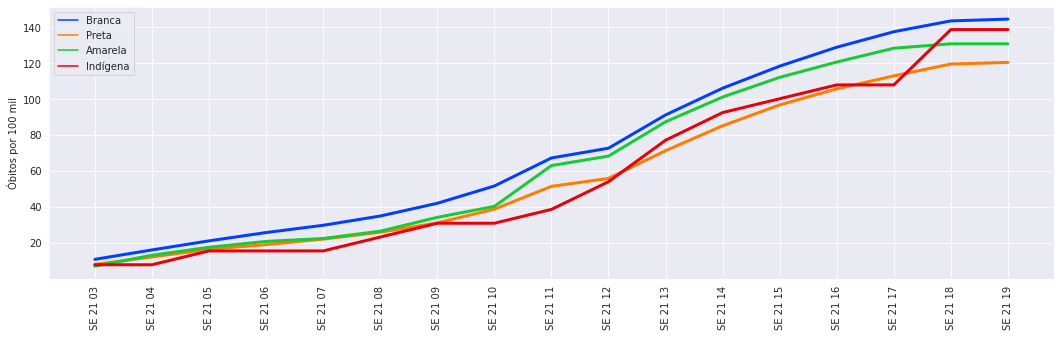

In [7]:
fig, axs = plt.subplots(figsize=(18, 5))
sns.lineplot(data=cor_se_norm, x='Semana Epidemiológica', y='Óbitos por 100 mil', hue='Cor', palette='bright', lw=3)
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('')
plt.show()

**Corrigindo por Idade**

In [8]:
df = pop_cor_idade.iloc[:-2].drop('Ignorada', axis=1)
df = df.melt(id_vars=['Cor', 'Total'], value_vars=df.columns[:-2], var_name='Faixa Etária', value_name="Habitantes")
df.loc[:, 'Habitantes'] = pd.to_numeric(df['Habitantes'], errors='coerce')
df.loc[:, 'Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Habitantes por total cor'] = df['Habitantes'] / df.loc[:, 'Total']
display(df.head())

,Cor,Total,Faixa Etária,Habitantes,Habitantes por total cor
0,Branca,6824668,0 a 4,444168,0.065083
1,Preta,4169301,0 a 4,257604,0.061786
2,Amarela,246244,0 a 4,8329,0.033824
3,Indígena,12977,0 a 4,813,0.062649
4,Branca,6824668,5 a 9,433860,0.063572


(0.0, 0.14)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


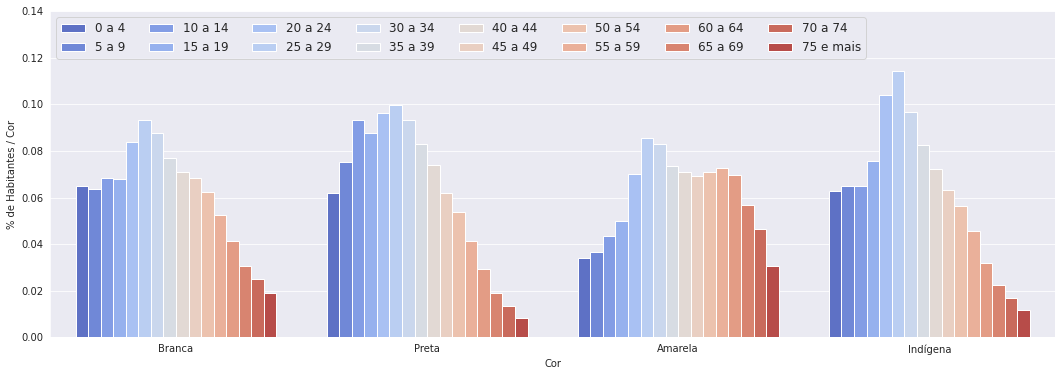

In [9]:
fig, axs = plt.subplots(figsize=(18, 6))
sns.barplot(data=df, hue='Faixa Etária', y='Habitantes por total cor', x='Cor', ax=axs, palette='coolwarm')
plt.legend(loc='upper left', ncol=len(pop_cor_idade.columns[1:-1])//2, fontsize=12)
plt.ylabel('% de Habitantes / Cor')
plt.ylim(0, 0.14)

In [10]:
#cor_idade_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/cor-idade-suspeitos-2020-2021.csv', sep=';', encoding = "ISO-8859-1",
                        #skiprows=[0,1,2,3,4,13,14,15,16])#Base commpleta atualizada até o dia 13/05/2021

#cor_idade_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/cor-idade-suspeitos-01-a-07_2020.csv', sep=';', encoding = "ISO-8859-1",
                        #skiprows=[0,1,2,3,4,13,14,15,16])#Base indo do mês 01 até 07 de 2020

#cor_idade_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/cor-idade-suspeitos-08-a-12_2020.csv', sep=';', encoding = "ISO-8859-1",
                        #skiprows=[0,1,2,3,4,13,14,15,16])#Base indo do mês 08 até 12 de 2020 

cor_idade_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/cor-idade-suspeitos-01-a-05_2021.csv', sep=';', encoding = "ISO-8859-1",
                        skiprows=[0,1,2,3,4,13,14,15,16])#Base indo do mês 01 até 05 de 2021 
cor_idade = cor_idade_.apply(pd.to_numeric, errors='coerce').fillna(0)
cor_idade.iloc[PRETA] = cor_idade.iloc[PRETA] + cor_idade.iloc[PARDA]
cor_idade = cor_idade.drop(PARDA)
cor_idade = cor_idade.drop(5) # Não informado
cor_idade['Cor'] = cor_idade_['Cor']

print('\n\nÓbitos confirmados de COVID - Raça / Idade')
display(cor_idade)



Óbitos confirmados de COVID - Raça / Idade


,Cor,0-4a,5-9a,10-14a,15-19a,20-24a,25-29a,30-34a,35-39a,40-44a,45-49a,50-54a,55-59a,60-64a,65-69a,70-74a,75 e mais,Ign,Total
0,Branca,5.0,0.0,4.0,7.0,27.0,58.0,135.0,251.0,312.0,504.0,672.0,954.0,1255.0,1532.0,1512.0,4041.0,1.0,11270.0
1,Preta,5.0,1.0,4.0,10.0,23.0,49.0,86.0,180.0,274.0,338.0,462.0,578.0,743.0,875.0,780.0,1291.0,2.0,5701.0
2,Amarela,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,6.0,11.0,20.0,27.0,43.0,59.0,191.0,0.0,366.0
4,Indígena,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,3.0,2.0,5.0,0.0,18.0
6,Total,10.0,1.0,8.0,19.0,51.0,110.0,224.0,440.0,614.0,874.0,1175.0,1597.0,2079.0,2515.0,2427.0,5697.0,4.0,17845.0


In [11]:
cor_idade_melt = cor_idade.melt(id_vars=['Cor', 'Total'], value_vars=cor_idade.columns[1:-2],
                                var_name='Faixa Etária', value_name='Óbitos')

cores = list(pop_cor_idade['Cor'].values)
faixa_etaria = { cor_idade.columns[k+1]: k for k in range(len(cor_idade.columns[1:-2])) }
habitantes = []
for i in range(len(cor_idade_melt)):
  linha = cor_idade_melt.iloc[i]
  hab = pop_cor_idade.iloc[cores.index(linha['Cor']), faixa_etaria[linha['Faixa Etária']]  ]
  habitantes.append(hab)

cor_idade_melt['Habitantes'] = habitantes
display(cor_idade_melt.tail(20))

,Cor,Total,Faixa Etária,Óbitos,Habitantes
60,Branca,11270.0,60-64a,1255.0,283006
61,Preta,5701.0,60-64a,743.0,122455
62,Amarela,366.0,60-64a,27.0,17175
63,Indígena,18.0,60-64a,1.0,413
64,Total,17845.0,60-64a,2079.0,423055
65,Branca,11270.0,65-69a,1532.0,208206
66,Preta,5701.0,65-69a,875.0,79847
67,Amarela,366.0,65-69a,43.0,13987
68,Indígena,18.0,65-69a,3.0,293
69,Total,17845.0,65-69a,2515.0,302338


**População Padrão**

In [12]:
cor_idade_melt['Óbitos por 100 mil'] = (100_000 * cor_idade_melt['Óbitos']) / cor_idade_melt['Habitantes']
display(cor_idade_melt.head())

,Cor,Total,Faixa Etária,Óbitos,Habitantes,Óbitos por 100 mil
0,Branca,11270.0,0-4a,5.0,444168,1.125700
1,Preta,5701.0,0-4a,5.0,257604,1.940964
2,Amarela,366.0,0-4a,0.0,8329,0.000000
3,Indígena,18.0,0-4a,0.0,813,0.000000
4,Total,17845.0,0-4a,10.0,710927,1.406614


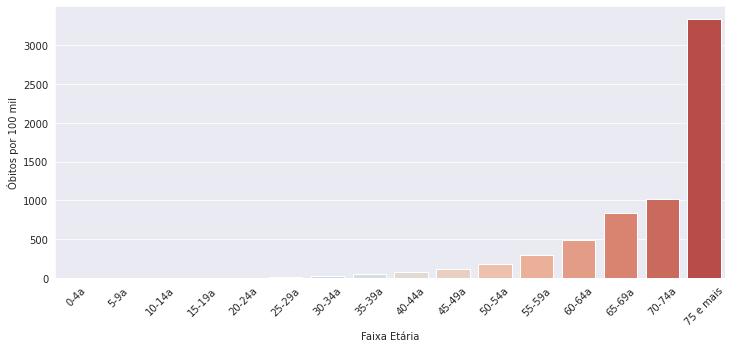

In [13]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.barplot(data = cor_idade_melt[cor_idade_melt['Cor'] == 'Total'], x='Faixa Etária', 
            y='Óbitos por 100 mil', ax=axs, palette='coolwarm')
plt.xticks(rotation=45) 
plt.show()

**Referência x Realidade**

In [14]:
pop_padrao = cor_idade_melt[cor_idade_melt['Cor'] == 'Total']['Óbitos por 100 mil'].to_numpy()

cor_idade_melt['Esperados'] = cor_idade_melt['Habitantes'] * np.repeat(pop_padrao, 5) / 100_000
resultado = cor_idade_melt.groupby('Cor').sum() 
resultado = resultado.drop('Total')
display(resultado)
print('\n')

,Total,Óbitos,Habitantes,Óbitos por 100 mil,Esperados
Cor,,,,,
Amarela,5856.0,366.0,237227,3781.004826,701.496500
Branca,180320.0,11269.0,6663579,5893.115863,12365.353847
Indígena,288.0,18.0,12807,6374.703104,17.553765
Preta,91216.0,5699.0,4135102,7696.174723,4756.295651


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  This is separate from the ipykernel package so we can avoid doing imports until


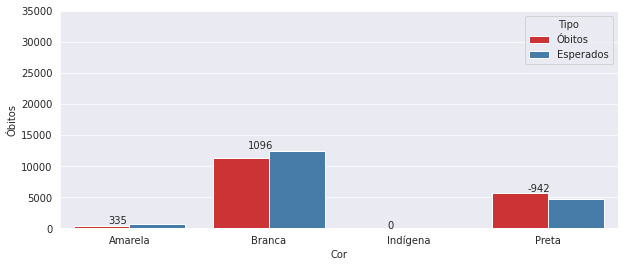

In [15]:
resultado['Cor'] = resultado.index
resultado_melt = resultado.melt(id_vars=['Cor'], value_vars=['Óbitos', 'Esperados'], 
                                var_name='Tipo', value_name='Óbitos' )

fig, axs = plt.subplots(figsize=(10, 4))
sns.barplot(data=resultado_melt, x='Cor', hue='Tipo', y='Óbitos', ax=axs, palette='Set1')

diff = (resultado['Esperados'] - resultado['Óbitos'] ).to_numpy() 
for k, d in enumerate(diff):
  altura = max(resultado['Esperados'].iloc[k], resultado['Óbitos'].iloc[k])
  plt.text(k-0.15, altura*1.04, str(int(d)) )

plt.ylim(0, 35000)
plt.show()

Text(0, 0.5, 'Óbitos por cor por 100 mil habitantes')

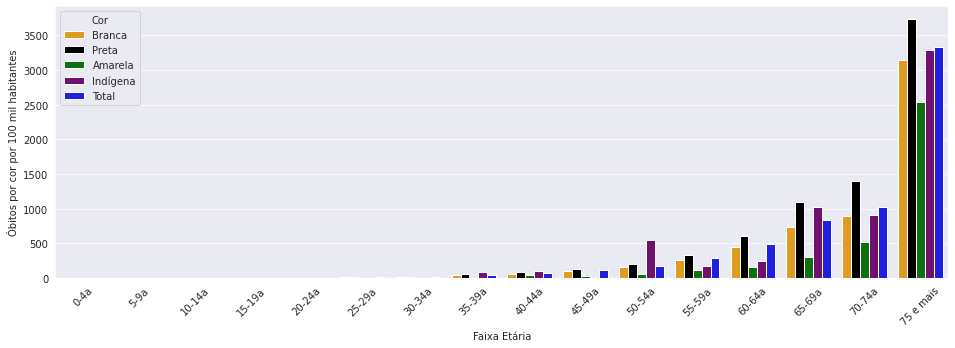

In [16]:
colors = ['orange', 'k', 'g', 'purple', 'b']
fig, axs = plt.subplots(figsize=(16, 5))
sns.barplot(data = cor_idade_melt, x='Faixa Etária', hue='Cor', 
            y='Óbitos por 100 mil', ax=axs, palette=sns.color_palette(colors) )
plt.xticks(rotation=45) 
plt.ylabel('Óbitos por cor por 100 mil habitantes')